<a href="https://colab.research.google.com/github/DevSingh28/Netflix_movie_explore-and-Recommender/blob/main/Netflix_movie_recommender.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download shivamb/netflix-shows

mkdir: cannot create directory ‘/root/.kaggle’: File exists
cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/shivamb/netflix-shows
License(s): CC0-1.0
  0% 0.00/1.34M [00:00<?, ?B/s]
100% 1.34M/1.34M [00:00<00:00, 142MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('netflix-shows.zip')
zip_ref.extractall()
zip_ref.close()

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px

In [ ]:
df = pd.read_csv('netflix_titles.csv')

In [ ]:
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


In [ ]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
df.shape

(8807, 12)

In [ ]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
df.isna().values.any()

True

In [ ]:
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [ ]:
df['type'].nunique()

2

In [ ]:
df['type']

0         Movie
1       TV Show
2       TV Show
3       TV Show
4       TV Show
         ...   
8802      Movie
8803    TV Show
8804      Movie
8805      Movie
8806      Movie
Name: type, Length: 8807, dtype: object

In [ ]:
# Create sepearte data base for movies and shows

df_movie = df[df['type'] == 'Movie']
df_show = df[df['type'] == 'TV Show']

In [ ]:
# Explore movie first
df_movie.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...


In [ ]:
df_movie.shape

(6131, 12)

In [ ]:
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [ ]:
x = df_movie.groupby('release_year').count()['title']

In [ ]:
sns.set_style('darkgrid')
px.line(x, title = 'Movie Release per Year')

In [ ]:
df_movie.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...


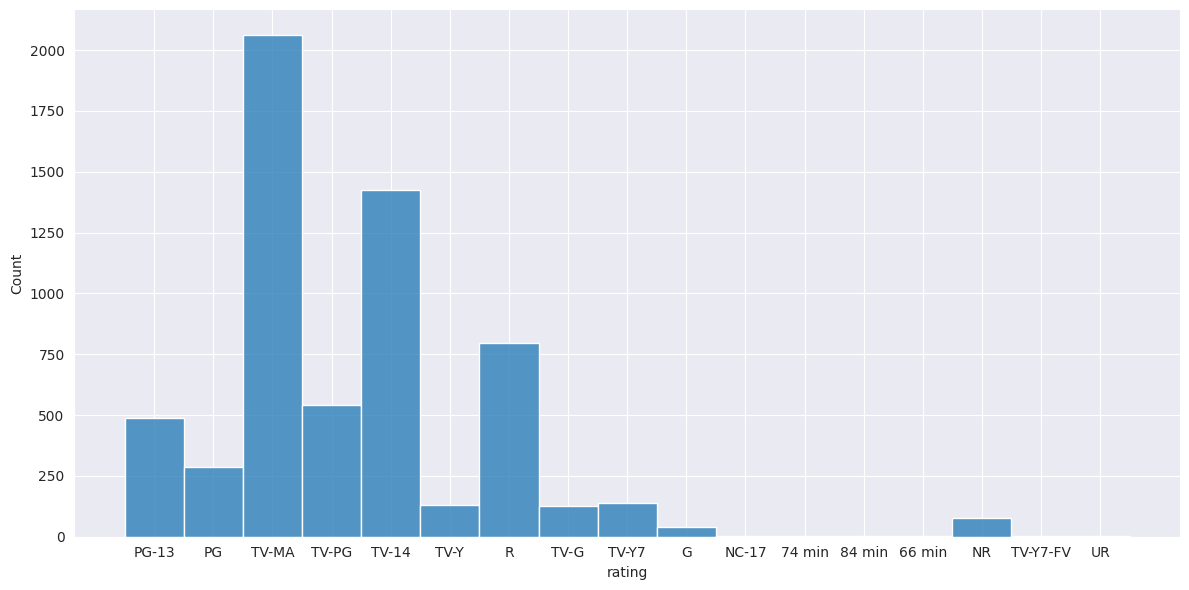

In [ ]:
sns.displot(df_movie, x='rating', height=6, aspect=2)

In [ ]:
# Most common duration of movies
movie_dur = df_movie['duration'].value_counts()

In [ ]:
px.bar(movie_dur, title = 'Most common duration of movies')

In [ ]:
# Director column has too many nan values ​​so it is better to skip it

df_movie.drop('director', axis=1, inplace=True)

<ipython-input-89-8e73f9e88ae9>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df_movie.head(2)

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,"Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...


In [ ]:
# Lets fill all other nan values with 0

df_movie.fillna('', inplace=True)

<ipython-input-91-c6703b51e6a8>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df_movie.isna().sum()

show_id         0
type            0
title           0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [ ]:
# Lets see which country has most movie

movie_country = df_movie['country'].value_counts()
movie_country = movie_country.sort_values(ascending=False)[:10]

In [ ]:
# The 0 above is nan value so ignore it :]
# Visualise it using plotly

In [ ]:
px.bar(movie_country, title = 'Most common country of movies')

In [ ]:
# Do same for shows but now let's start building our recommender system:

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
df_movie['combined_features'] = df_movie['title'] + ' ' + df_movie['cast'] + ' ' + df_movie['country'] + ' ' + df_movie['listed_in'] + ' ' + df_movie['description']

<ipython-input-95-b022f45406c3>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df_movie['combined_features']

0       Dick Johnson Is Dead  United States Documentar...
6       My Little Pony: A New Generation Vanessa Hudge...
7       Sankofa Kofi Ghanaba, Oyafunmike Ogunlano, Ale...
9       The Starling Melissa McCarthy, Chris O'Dowd, K...
12      Je Suis Karl Luna Wedler, Jannis Niewöhner, Mi...
                              ...                        
8801    Zinzana Ali Suliman, Saleh Bakri, Yasa, Ali Al...
8802    Zodiac Mark Ruffalo, Jake Gyllenhaal, Robert D...
8804    Zombieland Jesse Eisenberg, Woody Harrelson, E...
8805    Zoom Tim Allen, Courteney Cox, Chevy Chase, Ka...
8806    Zubaan Vicky Kaushal, Sarah-Jane Dias, Raaghav...
Name: combined_features, Length: 6131, dtype: object

In [ ]:
#Let's remove unexpected symbols and clean the data

In [ ]:
import re
def clean_text(text):
    text = re.sub(r' ', ' ', text)
    text = re.sub(r'\r', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = text.lower()
    return text

df_movie['combined_features'] = df_movie['combined_features'].apply(clean_text)

<ipython-input-101-3f126667439b>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df_movie['combined_features'][0]

'dick johnson is dead  united states documentaries as her father nears the end of his life filmmaker kirsten johnson stages his death in inventive and comical ways to help them both face the inevitable'

In [ ]:
df_movie['combined_features'][6]

'my little pony a new generation vanessa hudgens kimiko glenn james marsden sofia carson liza koshy ken jeong elizabeth perkins jane krakowski michael mckean phil lamarr  children  family movies equestrias divided but a brighteyed hero believes earth ponies pegasi and unicorns should be pals  and hoof to heart shes determined to prove it'

In [ ]:
tfid = TfidfVectorizer(stop_words='english')
x = tfid.fit_transform(df_movie['combined_features'])

In [ ]:
# I am using knn you can use (cosine_similarity)
from sklearn.neighbors import NearestNeighbors
knn = NearestNeighbors(metric='cosine', algorithm='brute')
knn.fit(x)

NearestNeighbors(algorithm='brute', metric='cosine')

In [ ]:
indices = pd.Series(df_movie.index, index=df_movie['title']).drop_duplicates()

In [ ]:
def recommender(title, n_recommendations=10):
    idx = indices[title]
    movie_vector = x[idx]
    distances, neighbor_indices = knn.kneighbors(movie_vector, n_neighbors=n_recommendations+1)
    movie_indices = neighbor_indices.flatten()
    return df_movie['title'].iloc[movie_indices[1:11]]

In [ ]:
recommender('Dick Johnson Is Dead')

5233    The Death and Life of Marsha P. Johnson
4877                                   End Game
7015                         How to Be a Player
5540                                 Win It All
6038                               A Gray State
6755                        Final Destination 3
3891        ReMastered: Devil at the Crossroads
854                Creating an Army of the Dead
4086                                  Paddleton
971                              Between Worlds
Name: title, dtype: object

In [ ]:
# Done (You can also build for netflix shows but i am only building it for movies steps are sa)